In [4]:
# %pip install MPh

In [5]:
# import mph

In [6]:
# client = mph.start(cores=1)

In [1]:
# %pip install steputils

In [24]:
%matplotlib inline

### Step File

In [2]:
from steputils import p21

In [3]:
file = p21.readfile('./step-test.step')

In [4]:
file.data

In [5]:
file

In [6]:
file.header

### Iges

In [7]:
# %pip install pyiges

In [8]:
import pyiges

In [19]:
from pyiges import examples

In [26]:
iges = pyiges.read('./iges-test.igs')

In [28]:
# iges.items

In [20]:
iges = pyiges.read(examples.impeller)

In [29]:
lines = iges.to_vtk(bsplines=True, surfaces=False, merge=True)

Converting entities to vtk: 100%|██████████| 2258/2258 [00:00<00:00, 3506.00it/s]


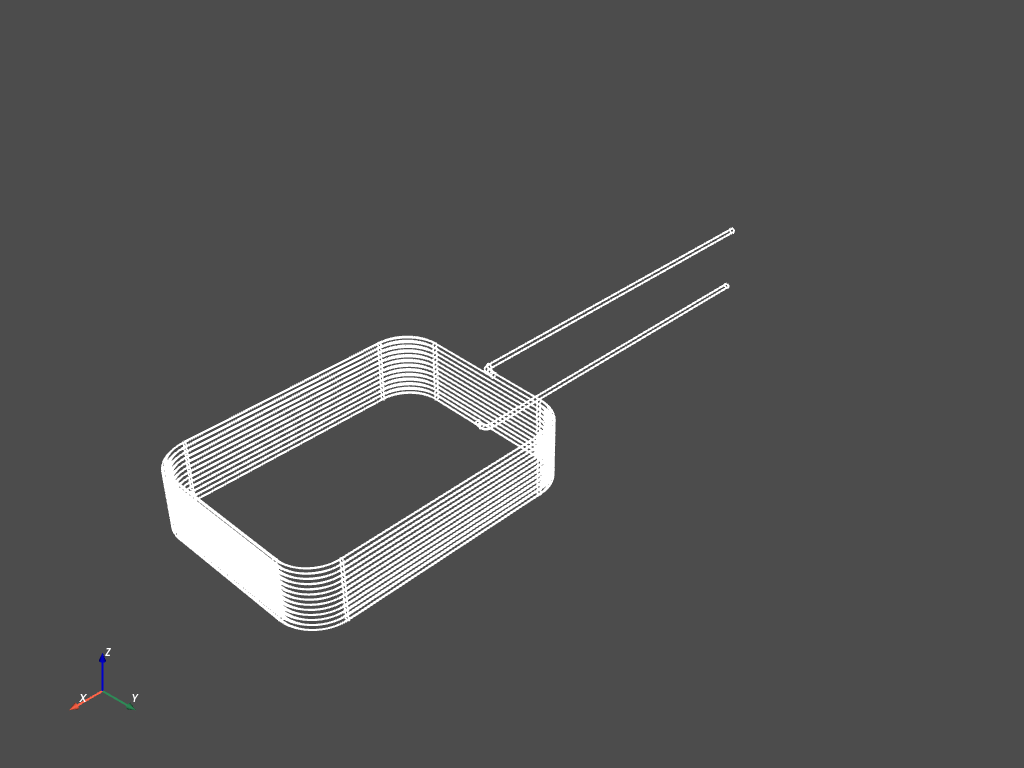

In [30]:
lines.plot(color='w', line_width=2)

In [36]:
type(lines)

pyvista.core.pointset.PolyData

In [37]:
from vtk.numpy_interface import dataset_adapter

In [40]:
data = dataset_adapter.WrapDataObject(lines).Points

In [43]:
data.shape

(35280, 3)

In [45]:
type(data)

vtk.numpy_interface.dataset_adapter.VTKArray

In [72]:
data.shape

(35280, 3)

In [74]:
data1 = data.reshape(-1, 4)

In [75]:
data1.shape

(26460, 4)

### Nifti

In [48]:
%pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [51]:
import nibabel
import numpy as np

In [67]:
_data = np.array(data, dtype=np.float32)

3D vs 4D??

In [82]:
affine = np.eye(4); affine

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [83]:
nifti = nibabel.Nifti1Image(data1, affine)

In [78]:
nibabel.save(nifti, './test-nifti')